In [1]:
from pysjef import Project, DirectoryNode, all_completed
from pysjef_molpro import no_errors
import numpy

In [2]:
root = DirectoryNode('dihedral_scan')

In [3]:
grid = numpy.linspace(0, 90, 21)
for i, D in enumerate(grid):
    p = root.add_child(f'd{i}', suffix='molpro')
    p.write_input(f"""nosym
    geometry={{
        H1
        C1 H1 rch
        C2 C1 rcc H1 A
        H2 C2 rch C1 A H1 D
        H3 C2 rch C1 A H2 180
        H4 C1 rch C2 A H1 180}}
    rch = 2.05; rcc = 2.65; A = 121.5; D ={D};
    basis = cc-pVTZ
    rhf
    {{casscf; closed, 7; occ, 9}}
    {{optg; inactive, D}}
    {{casscf, so_sci; closed, 7; occ, 9; wf; state, 3}}
    {{mrci; core, 2; wf; state, 3;}}""")

In [4]:
from multiprocessing.dummy import Pool
from operator import methodcaller
with Pool(processes=8) as pool:
    pool.map(methodcaller('run', backend='local', wait=True),
             root.children, 1)
print('all completed', all_completed(root.children))
print('without errors', no_errors(root.children))

all completed True
without errors True


<IPython.core.display.Javascript object>


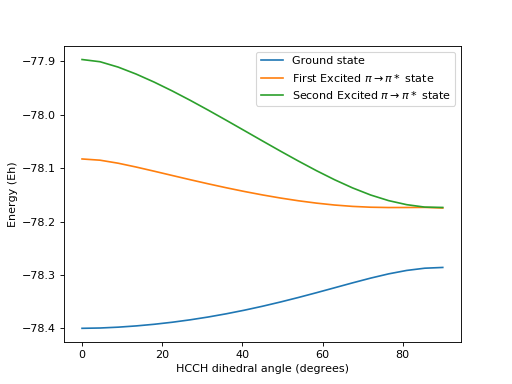

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
energies = root.select('//property[name=Energy, method=MRCI].value')
e1, e2, e3 = energies[::3], energies[1::3], energies[2::3]
cc = root.select('//variable[name=rcc]/value..')
plt.plot(grid, e1, grid, e2, grid, e3)
plt.legend(['Ground state',r'First Excited $\pi \rightarrow \pi*$ state',
            r'Second Excited $\pi \rightarrow \pi*$ state'])
plt.xlabel('HCCH dihedral angle (degrees)')
plt.ylabel('Energy (Eh)')
plt.show()

In [25]:
for i in range(len(e1)):
    print(('{:6} '+'{:.6f} '*3).format(grid[i], e1[i],e2[i],e3[i]))

   0.0 -78.399910 -78.082735 -77.896496 
   4.5 -78.399318 -78.085053 -77.900662 
   9.0 -78.397751 -78.090679 -77.910664 
  13.5 -78.395411 -78.097856 -77.923746 
  18.0 -78.392338 -78.105667 -77.938805 
  22.5 -78.388527 -78.113666 -77.955327 
  27.0 -78.383977 -78.121603 -77.972953 
  31.5 -78.378691 -78.129318 -77.991383 
  36.0 -78.372682 -78.136692 -78.010348 
  40.5 -78.365975 -78.143633 -78.029601 
  45.0 -78.358606 -78.150058 -78.048907 
  49.5 -78.350629 -78.155890 -78.068033 
  54.0 -78.342118 -78.161050 -78.086731 
  58.5 -78.333183 -78.165450 -78.104709 
  63.0 -78.323985 -78.168992 -78.121607 
  67.5 -78.314765 -78.171565 -78.136963 
  72.0 -78.305895 -78.173108 -78.150205 
  76.5 -78.297913 -78.173694 -78.160775 
  81.0 -78.291499 -78.173635 -78.168335 
  85.5 -78.287333 -78.173434 -78.172893 
  90.0 -78.285908 -78.174631 -78.173544 


<IPython.core.display.Javascript object>


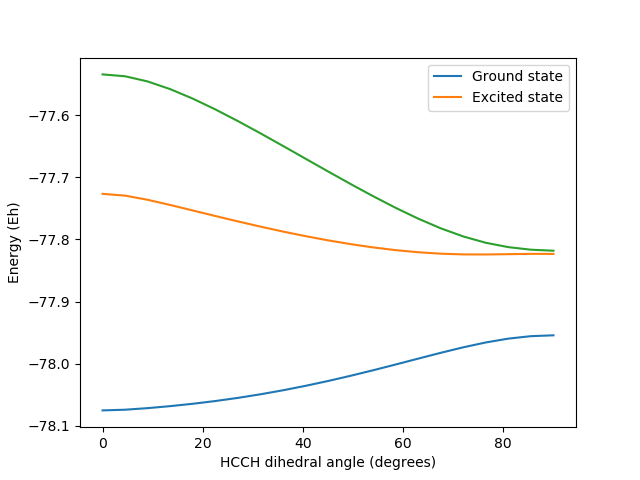

In [41]:
import matplotlib.pyplot as plt
%matplotlib notebook
energies = []
for p in root.children:
    n = p.select('//jobstep[command=CASSCF]')[-1]
    energies.append(n.select('property[name=energy].value'))
e1, e2, e3 = zip(*energies)
cc = root.select('//variable[name=rcc]/value..')
plt.plot(grid, e1, grid, e2,  grid, e3)
plt.legend(['Ground state','Excited state'])
plt.xlabel('HCCH dihedral angle (degrees)')
plt.ylabel('Energy (Eh)')
plt.show()

In [42]:
for i in range(len(e1)):
    print(('{:6} '+'{:.6f} '*3).format(grid[i], e1[i],e2[i],e3[i]))

   0.0 -78.075271 -77.726581 -77.534248 
   4.5 -78.074157 -77.729440 -77.537254 
   9.0 -78.071624 -77.736165 -77.545593 
  13.5 -78.068405 -77.744476 -77.557961 
  18.0 -78.064615 -77.753316 -77.573230 
  22.5 -78.060208 -77.762220 -77.590559 
  27.0 -78.055134 -77.770942 -77.609325 
  31.5 -78.049367 -77.779327 -77.629050 
  36.0 -78.042900 -77.787264 -77.649354 
  40.5 -78.035748 -77.794661 -77.669916 
  45.0 -78.027945 -77.801438 -77.690453 
  49.5 -78.019550 -77.807514 -77.710690 
  54.0 -78.010650 -77.812803 -77.730343 
  58.5 -78.001375 -77.817209 -77.749078 
  63.0 -77.991917 -77.820626 -77.766489 
  67.5 -77.982554 -77.822933 -77.782060 
  72.0 -77.973690 -77.824085 -77.795195 
  76.5 -77.965866 -77.824204 -77.805370 
  81.0 -77.959698 -77.823707 -77.812395 
  85.5 -77.955744 -77.823225 -77.816519 
  90.0 -77.954369 -77.823311 -77.818146 
